# HIERACHICAL CLUSTERING

Alla base di questo clusetring troviamo la seguente logica:
Una matrice delle distanze tra i punti (le righe del dataset), questa utilizza una distanza prefissata, comunemente quella euclidea. L'obbiettivo è quello di ottenere un clustering totale tra tutti i punti, tenendo traccia della sequenza delle unioni fatte durante l'algorimo. Ad ogni step vengono difatti creati i cluster con i punti più vicini, poi questi cluster vengono uniti ad altri e così via.
La differenza tra le tipologie di hierarchical clustering risiede nella logica con cui uniamo due cluster, quindi nella distanza che prendiamo in considerazione per scegliere i cluster più vicini da unire nello step.

## CYCLIST DATASET

In [12]:
import pandas as pd

from os import path
datasetname=path.join('..','..','..','dataset', 'cyclists_final_enhanced.csv')
df=pd.read_csv(datasetname)
df.head()

,_url,name,birth_year,weight,height,nationality,bmi,career_points,career_duration(days),career_duration(races),debut_year,avg_pos
0,bruno-surra,Bruno Surra,1964,73.0,185,Italy,21.329438,80.0,1.0,1.0,1989.0,110.000000
1,gerard-rue,Gérard Rué,1965,74.0,182,France,22.340297,26105.0,3492.0,222.0,1988.0,63.545045
2,jan-maas,Jan Maas,1996,69.0,189,Netherlands,19.316369,4425.0,519.0,49.0,2022.0,87.693878
3,nathan-van-hooydonck,Nathan Van Nathan Van Hooydonck,1995,78.0,192,Belgium,21.158854,17205.0,1982.0,161.0,2018.0,83.242236
4,jose-felix-parra,José Félix Parra,1997,55.0,171,Spain,18.809206,3085.0,721.0,48.0,2021.0,68.000000


Selezioniamo solo le colonne che contengono valori numerici e normalizziamo il dataset

In [13]:
from sklearn.preprocessing import StandardScaler

df=pd.DataFrame(df, columns=['birth_year','weight','height','bmi','career_points','career_duration(days)','career_duration(races)','debut_year','avg_pos'])
scaler = StandardScaler()
X = scaler.fit_transform(df)

### ALL FEATURE CLUSTERING

Quando andiamo ad eseguire il clustering considerando tutte le feature possiamo provare le diverse metodologie, per farci un idea di quale mostra dei clustering più netti con un numero di tagli ridotto.

I criteri di unione sono:


-single: distanza minima tra i punti del clustering

-complete: distanza massima tra i punti del clustering

-average: distanza media tra i punti 

-ward: metodo basato sull'eventuale aumento dell'errore quadratico in seguito all'unione dei cluster


#### Single

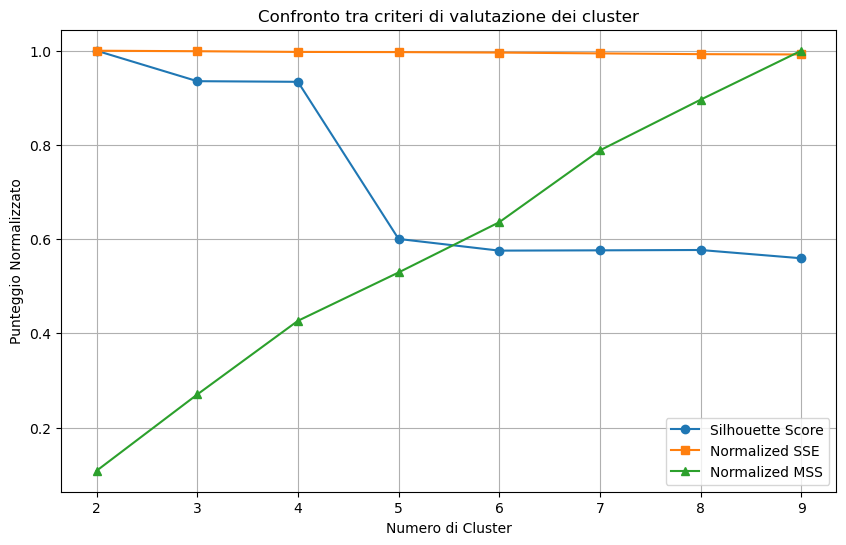

In [14]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

linkage_matrix = linkage(X, method='single')

range_n_clusters = range(2, 10)

silhouette_scores = []
sse_scores = []
mss_scores = []

for n_clusters in range_n_clusters:

    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    silhouette_scores.append(silhouette_score(X, clusters))

    sse = 0
    for cluster_id in np.unique(clusters):
        cluster_points = X[clusters == cluster_id]
        cluster_center = cluster_points.mean(axis=0)
        sse += np.sum((cluster_points - cluster_center) ** 2)
    sse_scores.append(sse)

    # Calcolo MSS (separazione media tra i cluster)
    cluster_centers = np.array([X[clusters == cluster_id].mean(axis=0) for cluster_id in np.unique(clusters)])
    cluster_distances = np.sum([np.linalg.norm(cluster_centers[i] - cluster_centers[j]) for i in range(len(cluster_centers)) for j in range(i + 1, len(cluster_centers))])
    mss_scores.append(cluster_distances / len(cluster_centers))

sse_scores = np.array(sse_scores) / max(sse_scores)
mss_scores = np.array(mss_scores) / max(mss_scores)
silhouette_scores = np.array(silhouette_scores) / max(silhouette_scores)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, label='Silhouette Score', marker='o')
plt.plot(range_n_clusters, sse_scores, label='Normalized SSE', marker='s')
plt.plot(range_n_clusters, mss_scores, label='Normalized MSS', marker='^')
plt.title("Confronto tra criteri di valutazione dei cluster")
plt.xlabel("Numero di Cluster")
plt.ylabel("Punteggio Normalizzato")
plt.legend()
plt.grid()
plt.show()

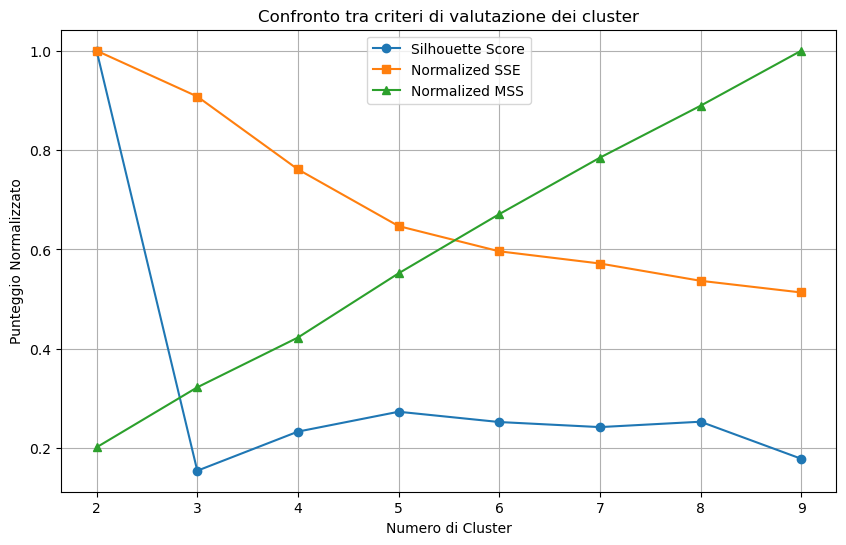

In [15]:
linkage_matrix = linkage(X, method='complete')

range_n_clusters = range(2, 10)

silhouette_scores = []
sse_scores = []
mss_scores = []

for n_clusters in range_n_clusters:

    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    silhouette_scores.append(silhouette_score(X, clusters))
    # Calcolo SSE
    sse = 0
    for cluster_id in np.unique(clusters):
        cluster_points = X[clusters == cluster_id]
        cluster_center = cluster_points.mean(axis=0)
        sse += np.sum((cluster_points - cluster_center) ** 2)
    sse_scores.append(sse)

    # Calcolo MSS 
    cluster_centers = np.array([X[clusters == cluster_id].mean(axis=0) for cluster_id in np.unique(clusters)])
    cluster_distances = np.sum([np.linalg.norm(cluster_centers[i] - cluster_centers[j]) for i in range(len(cluster_centers)) for j in range(i + 1, len(cluster_centers))])
    mss_scores.append(cluster_distances / len(cluster_centers))

sse_scores = np.array(sse_scores) / max(sse_scores)
mss_scores = np.array(mss_scores) / max(mss_scores)
silhouette_scores = np.array(silhouette_scores) / max(silhouette_scores)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, label='Silhouette Score', marker='o')
plt.plot(range_n_clusters, sse_scores, label='Normalized SSE', marker='s')
plt.plot(range_n_clusters, mss_scores, label='Normalized MSS', marker='^')
plt.title("Confronto tra criteri di valutazione dei cluster")
plt.xlabel("Numero di Cluster")
plt.ylabel("Punteggio Normalizzato")
plt.legend()
plt.grid()
plt.show()

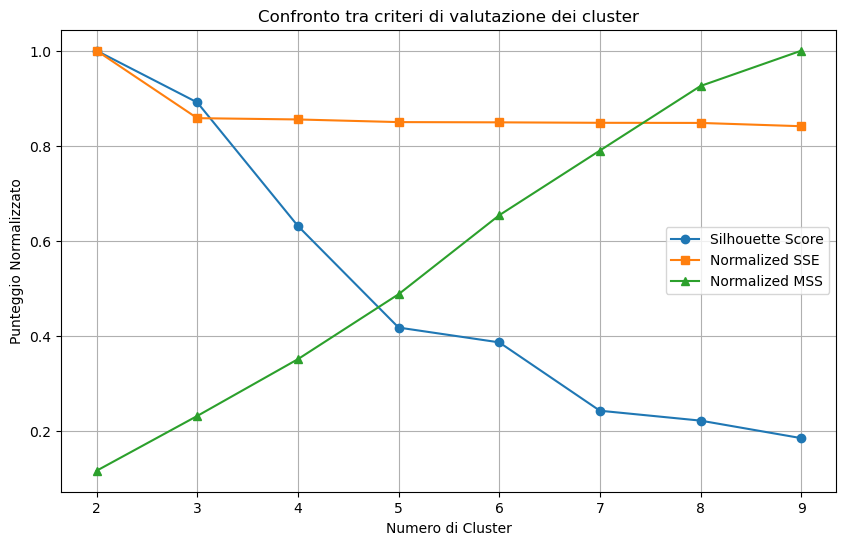

In [16]:
linkage_matrix = linkage(X, method='average')

range_n_clusters = range(2, 10)

silhouette_scores = []
sse_scores = []
mss_scores = []

for n_clusters in range_n_clusters:

    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    silhouette_scores.append(silhouette_score(X, clusters))
    # Calcolo SSE
    sse = 0
    for cluster_id in np.unique(clusters):
        cluster_points = X[clusters == cluster_id]
        cluster_center = cluster_points.mean(axis=0)
        sse += np.sum((cluster_points - cluster_center) ** 2)
    sse_scores.append(sse)

    # Calcolo MSS 
    cluster_centers = np.array([X[clusters == cluster_id].mean(axis=0) for cluster_id in np.unique(clusters)])
    cluster_distances = np.sum([np.linalg.norm(cluster_centers[i] - cluster_centers[j]) for i in range(len(cluster_centers)) for j in range(i + 1, len(cluster_centers))])
    mss_scores.append(cluster_distances / len(cluster_centers))

sse_scores = np.array(sse_scores) / max(sse_scores)
mss_scores = np.array(mss_scores) / max(mss_scores)
silhouette_scores = np.array(silhouette_scores) / max(silhouette_scores)

# Plot dei risultati
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, label='Silhouette Score', marker='o')
plt.plot(range_n_clusters, sse_scores, label='Normalized SSE', marker='s')
plt.plot(range_n_clusters, mss_scores, label='Normalized MSS', marker='^')
plt.title("Confronto tra criteri di valutazione dei cluster")
plt.xlabel("Numero di Cluster")
plt.ylabel("Punteggio Normalizzato")
plt.legend()
plt.grid()
plt.show()

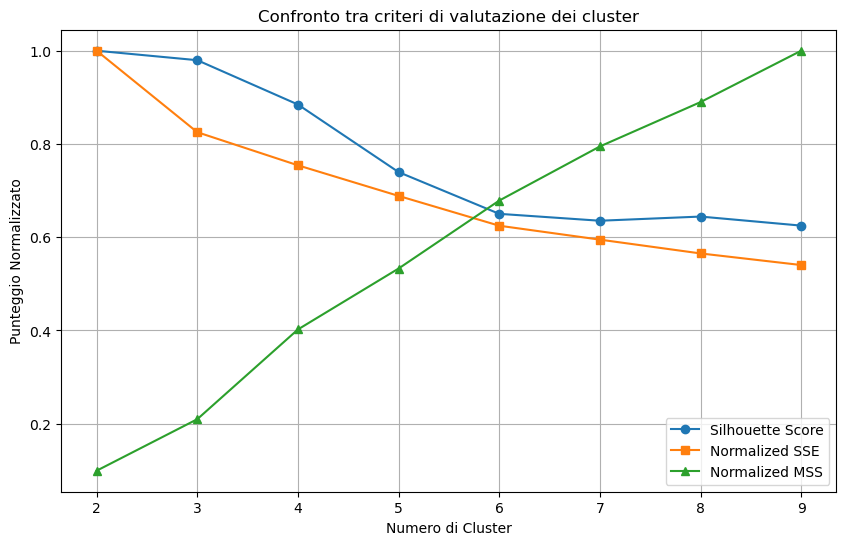

In [17]:
linkage_matrix = linkage(X, method='ward')

range_n_clusters = range(2, 10)

silhouette_scores = []
sse_scores = []
mss_scores = []

for n_clusters in range_n_clusters:

    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    silhouette_scores.append(silhouette_score(X, clusters))
    # Calcolo SSE
    sse = 0
    for cluster_id in np.unique(clusters):
        cluster_points = X[clusters == cluster_id]
        cluster_center = cluster_points.mean(axis=0)
        sse += np.sum((cluster_points - cluster_center) ** 2)
    sse_scores.append(sse)

    # Calcolo MSS 
    cluster_centers = np.array([X[clusters == cluster_id].mean(axis=0) for cluster_id in np.unique(clusters)])
    cluster_distances = np.sum([np.linalg.norm(cluster_centers[i] - cluster_centers[j]) for i in range(len(cluster_centers)) for j in range(i + 1, len(cluster_centers))])
    mss_scores.append(cluster_distances / len(cluster_centers))

sse_scores = np.array(sse_scores) / max(sse_scores)
mss_scores = np.array(mss_scores) / max(mss_scores)
silhouette_scores = np.array(silhouette_scores) / max(silhouette_scores)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, label='Silhouette Score', marker='o')
plt.plot(range_n_clusters, sse_scores, label='Normalized SSE', marker='s')
plt.plot(range_n_clusters, mss_scores, label='Normalized MSS', marker='^')
plt.title("Confronto tra criteri di valutazione dei cluster")
plt.xlabel("Numero di Cluster")
plt.ylabel("Punteggio Normalizzato")
plt.legend()
plt.grid()
plt.show()

Da queste analisi possiamo notare che in media il numero di cluster adatti per tutte le feature è 5-6, valutare solamente in base al silhouette potrebbe dare una stima errata in quanto considera la divisione tra i cluster e nel clustering gerarchico pochi cluster sono sinonimo di alta divisione.

### Aimed clustering
Per i clustering mirati a gruppi di feature specifici ci affidiamo al metodo di ward in quanto è quello più stabile per quanto riguarda la valutazione e in generale quello più affidabile

#### Caratteristiche fisiche (BMI, Peso, Altezza)

In [18]:
dfclust=pd.DataFrame(df, columns=['weight','height','bmi'])
scaler = StandardScaler()
Xclust = scaler.fit_transform(dfclust)

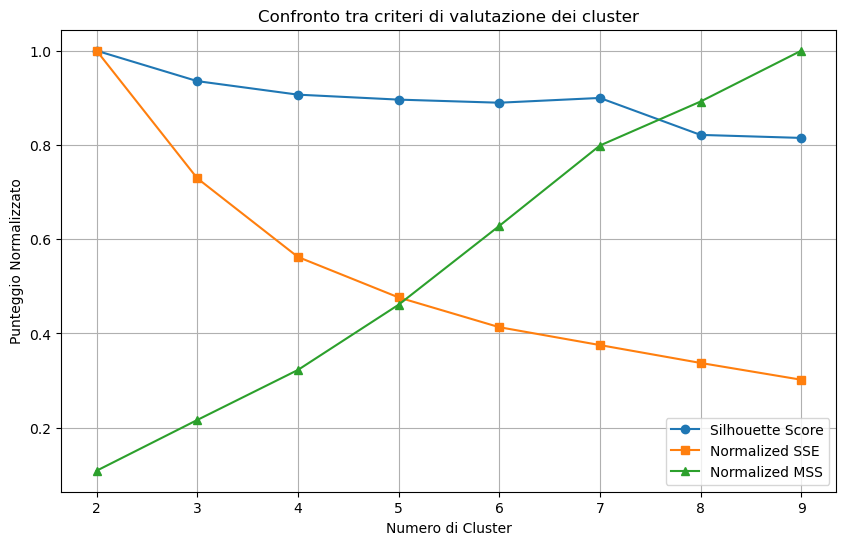

In [19]:
linkage_matrix = linkage(Xclust, method='ward')

range_n_clusters = range(2, 10)

silhouette_scores = []
sse_scores = []
mss_scores = []

for n_clusters in range_n_clusters:

    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    silhouette_scores.append(silhouette_score(Xclust, clusters))
    # Calcolo SSE
    sse = 0
    for cluster_id in np.unique(clusters):
        cluster_points = Xclust[clusters == cluster_id]
        cluster_center = cluster_points.mean(axis=0)
        sse += np.sum((cluster_points - cluster_center) ** 2)
    sse_scores.append(sse)

    # Calcolo MSS 
    cluster_centers = np.array([Xclust[clusters == cluster_id].mean(axis=0) for cluster_id in np.unique(clusters)])
    cluster_distances = np.sum([np.linalg.norm(cluster_centers[i] - cluster_centers[j]) for i in range(len(cluster_centers)) for j in range(i + 1, len(cluster_centers))])
    mss_scores.append(cluster_distances / len(cluster_centers))

sse_scores = np.array(sse_scores) / max(sse_scores)
mss_scores = np.array(mss_scores) / max(mss_scores)
silhouette_scores = np.array(silhouette_scores) / max(silhouette_scores)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, label='Silhouette Score', marker='o')
plt.plot(range_n_clusters, sse_scores, label='Normalized SSE', marker='s')
plt.plot(range_n_clusters, mss_scores, label='Normalized MSS', marker='^')
plt.title("Confronto tra criteri di valutazione dei cluster")
plt.xlabel("Numero di Cluster")
plt.ylabel("Punteggio Normalizzato")
plt.legend()
plt.grid()
plt.show()

In [22]:
import plotly.express as px

data_3d = dfclust.values

linkage_matrix = linkage(Xclust, method='ward')
n_clusters = 5
clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

df['cluster'] = clusters

fig = px.scatter_3d(
    df,
    x='weight',  
    y='height',  
    z='bmi',  
    color='cluster', 
    title='Cluster of physical features (Original Scale)',
    labels={'dim1': 'Dimension 1', 'dim2': 'Dimension 2', 'dim3': 'Dimension 3'},
    opacity=0.7  
)

fig.show()


#### Performances (avg_pos, career_points)

In [ ]:
dfclust=pd.DataFrame(df, columns=['avg_pos','career_points'])
scaler = StandardScaler()
Xclust = scaler.fit_transform(dfclust)

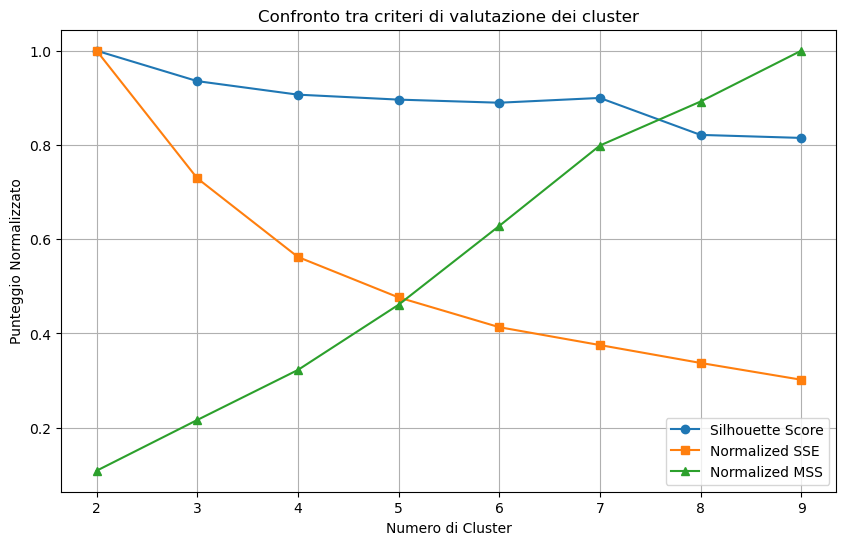

In [23]:
linkage_matrix = linkage(Xclust, method='ward')

range_n_clusters = range(2, 10)

silhouette_scores = []
sse_scores = []
mss_scores = []

for n_clusters in range_n_clusters:

    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    silhouette_scores.append(silhouette_score(Xclust, clusters))
    # Calcolo SSE
    sse = 0
    for cluster_id in np.unique(clusters):
        cluster_points = Xclust[clusters == cluster_id]
        cluster_center = cluster_points.mean(axis=0)
        sse += np.sum((cluster_points - cluster_center) ** 2)
    sse_scores.append(sse)

    # Calcolo MSS 
    cluster_centers = np.array([Xclust[clusters == cluster_id].mean(axis=0) for cluster_id in np.unique(clusters)])
    cluster_distances = np.sum([np.linalg.norm(cluster_centers[i] - cluster_centers[j]) for i in range(len(cluster_centers)) for j in range(i + 1, len(cluster_centers))])
    mss_scores.append(cluster_distances / len(cluster_centers))

sse_scores = np.array(sse_scores) / max(sse_scores)
mss_scores = np.array(mss_scores) / max(mss_scores)
silhouette_scores = np.array(silhouette_scores) / max(silhouette_scores)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, label='Silhouette Score', marker='o')
plt.plot(range_n_clusters, sse_scores, label='Normalized SSE', marker='s')
plt.plot(range_n_clusters, mss_scores, label='Normalized MSS', marker='^')
plt.title("Confronto tra criteri di valutazione dei cluster")
plt.xlabel("Numero di Cluster")
plt.ylabel("Punteggio Normalizzato")
plt.legend()
plt.grid()
plt.show()

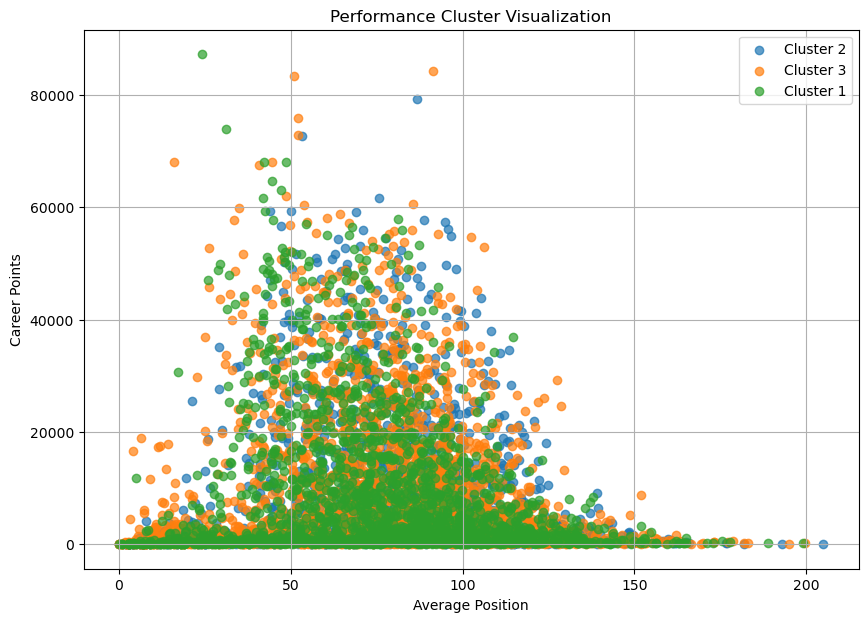

In [25]:
data_2d = dfclust.values

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_2d)

linkage_matrix = linkage(scaled_data, method='ward')
n_clusters = 3
clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

df['cluster'] = clusters

plt.figure(figsize=(10, 7))
for cluster_id in df['cluster'].unique():
    cluster_points = df[df['cluster'] == cluster_id]
    plt.scatter(cluster_points['avg_pos'], cluster_points['career_points'], label=f'Cluster {cluster_id}', alpha=0.7)

plt.title('Performance Cluster Visualization')
plt.xlabel('Average Position')
plt.ylabel('Career Points')
plt.legend()
plt.grid(True)
plt.show()

#### Valutazione Carriera (career_duration(races), career_points)

In [32]:
dfclust=pd.DataFrame(df, columns=['career_duration(races)','career_points'])



scaler = StandardScaler()
Xclust = scaler.fit_transform(dfclust)

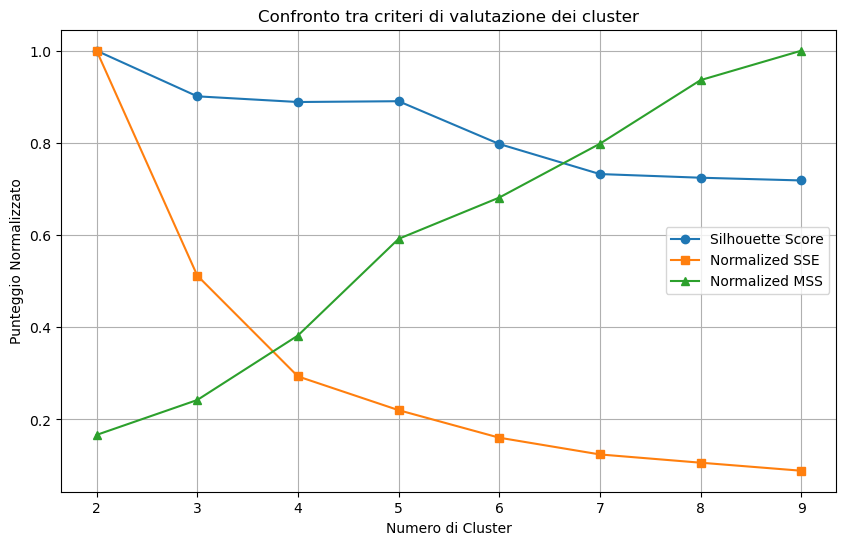

In [33]:
linkage_matrix = linkage(Xclust, method='ward')

range_n_clusters = range(2, 10)

silhouette_scores = []
sse_scores = []
mss_scores = []

for n_clusters in range_n_clusters:

    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    silhouette_scores.append(silhouette_score(Xclust, clusters))
    # Calcolo SSE
    sse = 0
    for cluster_id in np.unique(clusters):
        cluster_points = Xclust[clusters == cluster_id]
        cluster_center = cluster_points.mean(axis=0)
        sse += np.sum((cluster_points - cluster_center) ** 2)
    sse_scores.append(sse)

    # Calcolo MSS 
    cluster_centers = np.array([Xclust[clusters == cluster_id].mean(axis=0) for cluster_id in np.unique(clusters)])
    cluster_distances = np.sum([np.linalg.norm(cluster_centers[i] - cluster_centers[j]) for i in range(len(cluster_centers)) for j in range(i + 1, len(cluster_centers))])
    mss_scores.append(cluster_distances / len(cluster_centers))

sse_scores = np.array(sse_scores) / max(sse_scores)
mss_scores = np.array(mss_scores) / max(mss_scores)
silhouette_scores = np.array(silhouette_scores) / max(silhouette_scores)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, label='Silhouette Score', marker='o')
plt.plot(range_n_clusters, sse_scores, label='Normalized SSE', marker='s')
plt.plot(range_n_clusters, mss_scores, label='Normalized MSS', marker='^')
plt.title("Confronto tra criteri di valutazione dei cluster")
plt.xlabel("Numero di Cluster")
plt.ylabel("Punteggio Normalizzato")
plt.legend()
plt.grid()
plt.show()

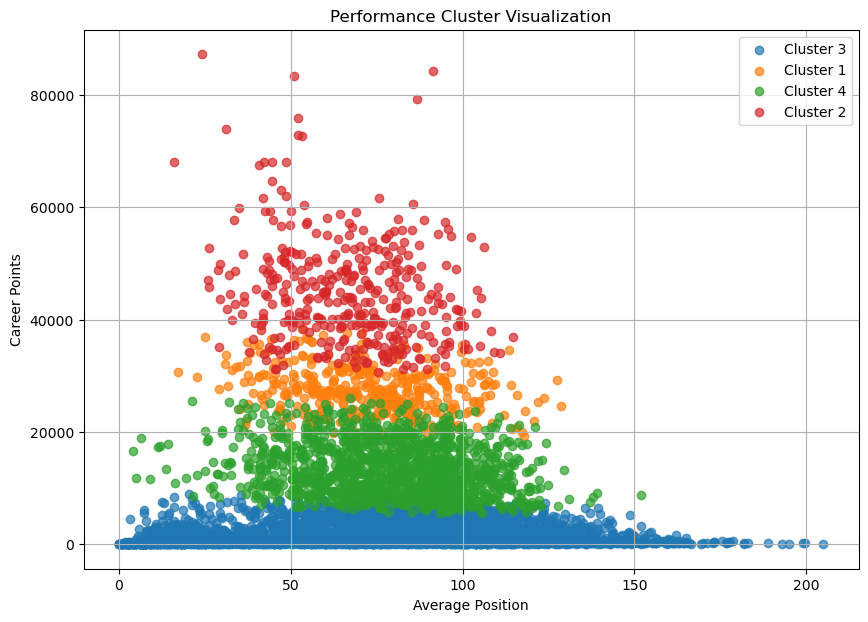

In [34]:
data_2d = dfclust.values

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_2d)

linkage_matrix = linkage(scaled_data, method='ward')
n_clusters = 4
clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

df['cluster'] = clusters

plt.figure(figsize=(10, 7))
for cluster_id in df['cluster'].unique():
    cluster_points = df[df['cluster'] == cluster_id]
    plt.scatter(cluster_points['avg_pos'], cluster_points['career_points'], label=f'Cluster {cluster_id}', alpha=0.7)

plt.title('Performance Cluster Visualization')
plt.xlabel('Average Position')
plt.ylabel('Career Points')
plt.legend()
plt.grid(True)
plt.show()

#### 